In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

In [2]:
sonar = pd.read_csv("dataset\sonar.csv", header = None)

In [3]:
sonar = sonar.sample(frac=1)
#print(sonar)
sonar.shape

(208, 61)

In [4]:
sonar = sonar.values

In [5]:
traindata = sonar[:126,:60].astype('float32')
trainlabel = sonar[:126,60]

#len(traindata)

In [6]:
trainlabel.shape

(126,)

In [7]:
valdata = sonar[126:146,:60]
vallabel = sonar[126:146,-1]
valdata = valdata.astype('float32')
#len(valdata)

In [8]:
testdata = sonar[146:,:60]
testlabel = sonar[146:,-1]
testdata = testdata.astype('float32')
len(testdata)

62

In [9]:
from sklearn.preprocessing import LabelEncoder
# encode class values as integers
le = LabelEncoder()
trainlabel = le.fit_transform(trainlabel)
#encoded_train = tf.keras.utils.to_categorical(trainlabel)
testlabel = le.fit_transform(testlabel)
#encoded_test = tf.keras.utils.to_categorical(testlabel)
validlabel = le.fit_transform(vallabel)
#encoded_val = tf.keras.utils.to_categorical(validlabel)

In [10]:
validlabel.shape

(20,)

In [12]:
trainlabel

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [13]:
model = models.Sequential()
model.add(layers.Input(shape = (60,)))
#model.add(layers.Dropout(0.001))
#model.add(layers.Dense(80, activation = "tanh"))
model.add(layers.Dense(25, activation = "relu"))
#model.add(layers.LeakyReLU(alpha=0.05))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(traindata , trainlabel , epochs=200,validation_data = (valdata,validlabel))

Train on 126 samples, validate on 20 samples
Epoch 1/200
126/126 [==============================] - 1s 9ms/sample - loss: 0.6902 - accuracy: 0.5317 - val_loss: 0.6926 - val_accuracy: 0.5500
Epoch 2/200
126/126 [==============================] - 0s 277us/sample - loss: 0.6809 - accuracy: 0.5714 - val_loss: 0.6753 - val_accuracy: 0.5500
Epoch 3/200
126/126 [==============================] - 0s 270us/sample - loss: 0.6749 - accuracy: 0.5635 - val_loss: 0.6637 - val_accuracy: 0.6500
Epoch 4/200
126/126 [==============================] - 0s 214us/sample - loss: 0.6708 - accuracy: 0.5794 - val_loss: 0.6545 - val_accuracy: 0.7000
Epoch 5/200
126/126 [==============================] - 0s 246us/sample - loss: 0.6653 - accuracy: 0.5873 - val_loss: 0.6505 - val_accuracy: 0.7000
Epoch 6/200
126/126 [==============================] - 0s 230us/sample - loss: 0.6599 - accuracy: 0.5952 - val_loss: 0.6494 - val_accuracy: 0.7500
Epoch 7/200
126/126 [==============================] - 0s 246us/sample - lo

126/126 [==============================] - 0s 309us/sample - loss: 0.4576 - accuracy: 0.8730 - val_loss: 0.5965 - val_accuracy: 0.8000
Epoch 57/200
126/126 [==============================] - 0s 301us/sample - loss: 0.4545 - accuracy: 0.8730 - val_loss: 0.5985 - val_accuracy: 0.8000
Epoch 58/200
126/126 [==============================] - 0s 317us/sample - loss: 0.4516 - accuracy: 0.8730 - val_loss: 0.5997 - val_accuracy: 0.8000
Epoch 59/200
126/126 [==============================] - 0s 301us/sample - loss: 0.4484 - accuracy: 0.8571 - val_loss: 0.6047 - val_accuracy: 0.8000
Epoch 60/200
126/126 [==============================] - 0s 278us/sample - loss: 0.4454 - accuracy: 0.8651 - val_loss: 0.6031 - val_accuracy: 0.8000
Epoch 61/200
126/126 [==============================] - 0s 293us/sample - loss: 0.4424 - accuracy: 0.8651 - val_loss: 0.6002 - val_accuracy: 0.8000
Epoch 62/200
126/126 [==============================] - 0s 286us/sample - loss: 0.4393 - accuracy: 0.8651 - val_loss: 0.5992 

126/126 [==============================] - 0s 246us/sample - loss: 0.3343 - accuracy: 0.8968 - val_loss: 0.6551 - val_accuracy: 0.7000
Epoch 112/200
126/126 [==============================] - 0s 238us/sample - loss: 0.3322 - accuracy: 0.8968 - val_loss: 0.6584 - val_accuracy: 0.7000
Epoch 113/200
126/126 [==============================] - 0s 262us/sample - loss: 0.3304 - accuracy: 0.9048 - val_loss: 0.6587 - val_accuracy: 0.7000
Epoch 114/200
126/126 [==============================] - 0s 238us/sample - loss: 0.3307 - accuracy: 0.9048 - val_loss: 0.6527 - val_accuracy: 0.7000
Epoch 115/200
126/126 [==============================] - 0s 222us/sample - loss: 0.3275 - accuracy: 0.9127 - val_loss: 0.6553 - val_accuracy: 0.7000
Epoch 116/200
126/126 [==============================] - 0s 278us/sample - loss: 0.3265 - accuracy: 0.9048 - val_loss: 0.6642 - val_accuracy: 0.7000
Epoch 117/200
126/126 [==============================] - 0s 262us/sample - loss: 0.3253 - accuracy: 0.9127 - val_loss: 0

126/126 [==============================] - 0s 238us/sample - loss: 0.2666 - accuracy: 0.9286 - val_loss: 0.7295 - val_accuracy: 0.7000
Epoch 167/200
126/126 [==============================] - 0s 286us/sample - loss: 0.2667 - accuracy: 0.9286 - val_loss: 0.7290 - val_accuracy: 0.7500
Epoch 168/200
126/126 [==============================] - 0s 238us/sample - loss: 0.2649 - accuracy: 0.9286 - val_loss: 0.7358 - val_accuracy: 0.7000
Epoch 169/200
126/126 [==============================] - 0s 246us/sample - loss: 0.2640 - accuracy: 0.9286 - val_loss: 0.7334 - val_accuracy: 0.7500
Epoch 170/200
126/126 [==============================] - 0s 254us/sample - loss: 0.2629 - accuracy: 0.9286 - val_loss: 0.7354 - val_accuracy: 0.7500
Epoch 171/200
126/126 [==============================] - 0s 246us/sample - loss: 0.2648 - accuracy: 0.9286 - val_loss: 0.7423 - val_accuracy: 0.7000
Epoch 172/200
126/126 [==============================] - 0s 214us/sample - loss: 0.2627 - accuracy: 0.9286 - val_loss: 0

In [16]:
result = model.evaluate(testdata, testlabel,verbose=2)

62/1 - 0s - loss: 0.3837 - accuracy: 0.7581


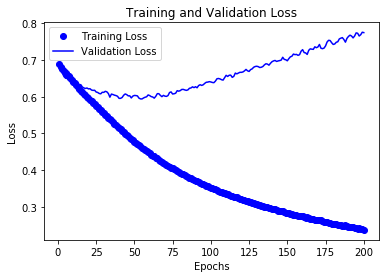

In [18]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo",label = "Training Loss")
plt.plot(epochs, val_loss, "b",label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

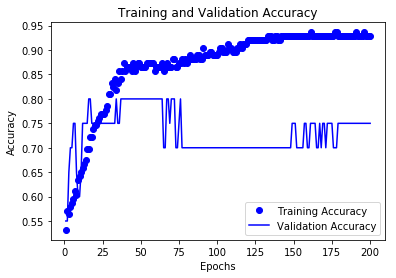

In [19]:
import matplotlib.pyplot as plt
loss = history.history["accuracy"]
val_loss = history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo",label = "Training Accuracy")
plt.plot(epochs, val_loss, "b",label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()